(app:qm-bound-states)=
# A Quantum Particle in a Potential Well

A particle of mass $m$ is trapped in a square well potential of depth $V_0$ and width $2a$ (See {numref}`fig_qm_well`).  The energy eigenvalue $E$ is determined by the Sch&ouml;dinger equation:

$$
\left[ -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right] \psi(x) = E \psi(x)
$$

Although no closed form solution is available, the analytical calculation indicates that the eigenvalues are determined by the following transcendental equations:{cite}`Griffiths2018`

$$
f_\text{e}(z) \equiv z \tan(z) - \sqrt{z_0^2 - z^2} = 0, \qquad \text{for even states}
$$(eq_square_well_even)

and

$$
f_\text{o}(z) \equiv z \cot(z) + \sqrt{z_0^2 - z^2} = 0, \qquad \text{for odd states}
$$(eq_square_well_odd)

where we introduced the normalized variable and constant:

$$
z = \sqrt{\frac{2 m a^2 E}{\hbar^2}}, \qquad \text{and} \qquad z_0 = \sqrt{\frac{2 m a^2 V_0}{\hbar^2}}
$$

Once we find the value of $z$, the corresponding energy value is given by $E = V_0 \left(\displaystyle\frac{z}{z_0}\right)^2$.

```{figure} square_well_energy.png
---
height: 300px
name: fig_qm_well
---
Wavefunctions and energy levels of a quantum particle bounded in a square potential well of depth $V_0$ and width $2a$.  The wave functions for $n=0$ and $2$ are even with respect to the space inversion and odd for $n=1$ and $3$.
```

The roots of Eqs. {eq}`eq_square_well_even` and {eq}`eq_square_well_odd` determine the energy eigenvalues. We want to bracket the roots but finding them by a numerical method is not easy since the functions {eq}`eq_square_well_even` and {eq}`eq_square_well_odd` are not continuous. Furthermore, the number of roots depends on the system parameter $z_0$.  Fortunately, we can analytically find the brackets with a little help of mathematics and visualization.  The following code plots $f_1(z)=z \tan(z)$ and $g_1(z)=\sqrt{z_0^2-z^2}$ for even states and $f_2(z)=z \cot(z)$ and $g_2(z)=-\sqrt{z_0^2-z^2}$.  The roots are intersections of $f_i(z)$ and $g_i(z)$.  $f_1(z)$ diverges at $z=\left(n+1/2\right) \pi$ and  $f_2(z)$ at $z= n \pi$ where $n$ is integer. $g_1(z)$ and $g_2(z)$ are quarter circles with radius $z_0$. 

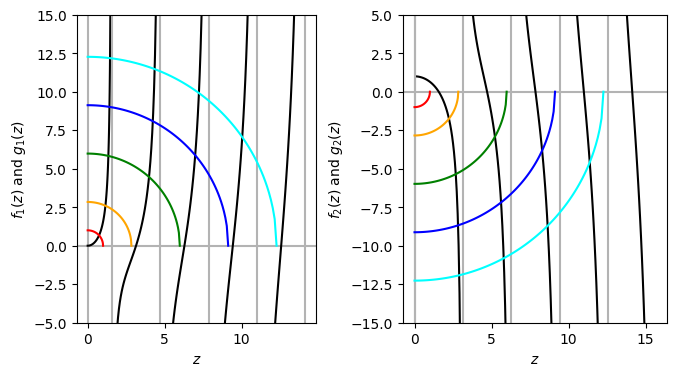

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# the number of data points in one curve
N=101

# set 5 different value of z0
z0 = np.linspace(0,4,5)*np.pi-0.3
# the first one is special
z0[0]=1



# color for parameter z0
c = ['red','orange','green','blue','cyan']


plt.figure(figsize=(8,4))

# for even states
plt.subplot(1,2,1)
plt.gca().set_aspect('equal')
plt.ylim(-5,15)
plt.xlabel(r'$z$')
plt.ylabel(r"$f_1(z)$ and $g_1(z)$")
plt.axhline(y = 0, color = '0.7', linestyle = '-')
plt.axvline(x = 0, color = '0.7', linestyle = '-')

def f1(z):
    return z*np.tan(z)
    
def g1(z,z0):
    return np.sqrt(z0**2-z**2)

# plotting f_1(z)
# the first block (0<z<pi/2)
z=np.linspace(0,np.pi/2-0.05,N)
y=f1(z)
plt.plot(z,y,'-k')
plt.axvline(x = np.pi/2, color='0.7', linestyle = '-')

# remaining blocks
for k in range(4):
    x0=(k+0.5)*np.pi
    x1=x0+np.pi
    z=np.linspace(x0+0.1,x1-0.1)
    y=f1(z)
    plt.plot(z,y,'-k')
    plt.axvline(x = x1, color='0.7', linestyle = '-')

# plotting g_1(z)
for k in range(5):
    z=np.linspace(0,z0[k],N)
    y=g1(z,z0[k])
    plt.plot(z,y,'-',color=c[k])


# Plots for odd states
plt.subplot(1,2,2)
# set aspect ration so that g(z) appears as a quarter circle 
plt.gca().set_aspect('equal')

plt.ylim(-15,5)
plt.xlabel(r'$z$')
plt.ylabel(r"$f_2(z)$ and $g_2(z)$")
plt.axhline(y = 0, color = '0.7', linestyle = '-')
plt.axvline(x = 0, color = '0.7', linestyle = '-')

def f2(z):
    return z/np.tan(z)

def g2(z,z0):
    return -np.sqrt(z0**2-z**2)

# plotting f_2(z)
for k in range(5):
    x0=k*np.pi
    x1=x0+np.pi
    z=np.linspace(x0+0.1,x1-0.1)
    y=f2(z)
    plt.plot(z,y,'-k')
    # singular point
    plt.axvline(x = x0, color='0.7', linestyle = '-')

# plotiing g_2(z)
for k in range(5):
    z=np.linspace(0,z0[k],N)
    y=g2(z,z0[k])
    plt.plot(z,y,'-',color=c[k])

plt.show()

**Example** We try to find all energy eigenvalues for $z_0=6$.  Based on the above discussion, there are three even states and two odd states.

In [2]:
import numpy as np
from scipy.optimize import bisect

def f1(z):
    return z*np.tan(z) - np.sqrt(z0**2-z**2)
    
def f2(z):
    return z/np.tan(z) + np.sqrt(z0**2-z**2)

# set the parameter
z0=10.0
# a small shift from the singular points.
d=0.001

root=[]

# for even states
kmax=round(z0/np.pi+1/2)
b1 = 0.0
b2 = np.pi/2
for k in range(kmax):
    root.append(bisect(f1,b1+d,b2-d))
    b1=b2
    b2=min(b1+np.pi,z0)

# for odd states
kmax=round(z0/np.pi)
b1 = 0.0
b2 = np.pi
for k in range(kmax):
    root.append(bisect(f2,b1+d,b2-d))
    b1=b2
    b2=min(b1+np.pi,z0)

root.sort()
r=np.array(root)
energy=(r/z0)**2

print("There are {0:3d} bound states.".format(np.size(r)))
print("{0:^5}  {1:^10}  {2:^10}".format('n','z','E/V0'))
for k in range(np.size(r)):
    print("{0:3d}  {1:10.5f}  {2:10.5f}".format(k,r[k],energy[k]))
    

There are   7 bound states.
  n        z          E/V0   
  0     1.42755     0.02038
  1     2.85234     0.08136
  2     4.27110     0.18242
  3     5.67921     0.32253
  4     7.06889     0.49969
  5     8.42320     0.70950
  6     9.67888     0.93681


Notice that the lowest energy is not zero due to the uncertainty principle.  Unlike the quantum harmonic oscillator, the energy gaps between the adjacent levels are not a constant. It increases as the level goes up. The highest energy is close to $V_0$.  Above this energy, the particle is not bound in the potential.  

Now we compare the results with a quantum state of particle in a box ($V_0 \rightarrow \infty$).  The energy of the $n$-th state for the particle in the box is given by $K_n=\displaystyle\frac{\hbar^2}{2m a^2} \left(\frac{\pi n}{2}\right)^2$ whereas the enery of the particle in a finite well is $E_n=\displaystyle\frac{\hbar^2}{2m a^2} z_n^2$ where $z_n$ is the $n$-th root. We plot $E_n/K_n = \left(\displaystyle\frac{2 z_n}{n \pi}\right)^2$.

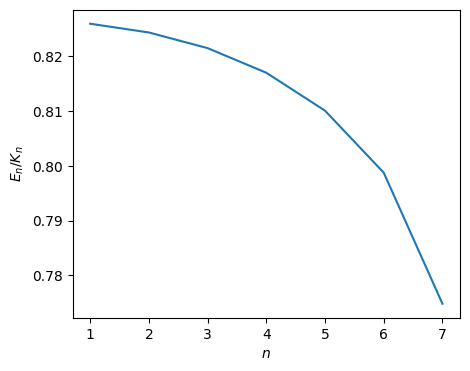

In [3]:
# continued from the previous code cell
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))

x=np.linspace(1,7,7)
y=(2*r/np.pi/x)**2

plt.plot(x,y)
plt.xlabel(r"$n$")
plt.ylabel(r"$E_n/K_n$")
plt.show()

The difference is not very big, especially near the ground state.  Where as the wave functions of particle in the box are completely bounded in the potential, the wave function of the particle on the shallow well leaks out substantially, which reduces its kinetic energy. The extent of the leakage is small near the bottom of the potential and thus the two potentials have similar ground states.


___

Updated on 3/25/2024 by R. Kawai